In [1]:
import sys
sys.path.append('../src')

In [2]:
from metrics import calculate_false_alarm, calculate_delay, calculate_precision, compute_metrics
from loading import *
from visualization import *
from features import *
from helpers import *

from matplotlib import pyplot as plt
%matplotlib inline

# Extract metrics for feature according to threshold value

In [3]:
data_path = "../data/"
patient_data = load_patient_seizures(data_path, 1,all_seizures=True, delta=1)

In [4]:
eegs = patient_data['eegs']
ranges = patient_data['ranges']
seizure_start_s = patient_data["infos"]["seizure_start"]
seizure_end_s = patient_data["infos"]["seizure_end"] 

In [5]:
num_sensors = len(eegs[0][0])
ordered_power_eeg = top_signals(eegs, ranges, top=num_sensors, id_seizure = None)
max_power_eeg = ordered_power_eeg[0]
min_power_eeg = ordered_power_eeg[-1]

## Convert seizure sample ranges into sliding window ranges

In [6]:
window_size = 128
step_size = 64

In [7]:
indexes = convert_sample_ranges_to_window_ranges(ranges,window_size,step_size,1843200)
indexes_ = convert_sample_ranges_to_window_ranges(ranges,window_size*16,step_size*16,1843200)

## Computing signal features

In [8]:
min_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_min, max_power_eeg)

In [9]:
max_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_max, max_power_eeg)

In [10]:
energy_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_energy, max_power_eeg)

In [11]:
line_length_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_line_length, max_power_eeg)

In [12]:
moving_avg_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_moving_avg, max_power_eeg)

In [13]:
skewness_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_skewness, max_power_eeg)

In [14]:
kurtosis_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_kurtosis, max_power_eeg)

In [15]:
shannon_entropy_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_shannon_entropy, max_power_eeg)

In [16]:
lbp_feature_signals = calculate_feature(eegs, 16, 8, calculate_lbp, max_power_eeg)

In [17]:
phase_synchrony_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_phase_synchrony, max_power_eeg, min_power_eeg)

## Plotting real signal and computed feature signal for seizure 0

In [18]:
signal = real_signal = eegs[0][1][max_power_eeg].T

In [19]:
min_seizure1_single = min_feature_signals[0][1]
min_seizure1_single_scaled = scale_signal(min_seizure1_single, window_size, step_size)

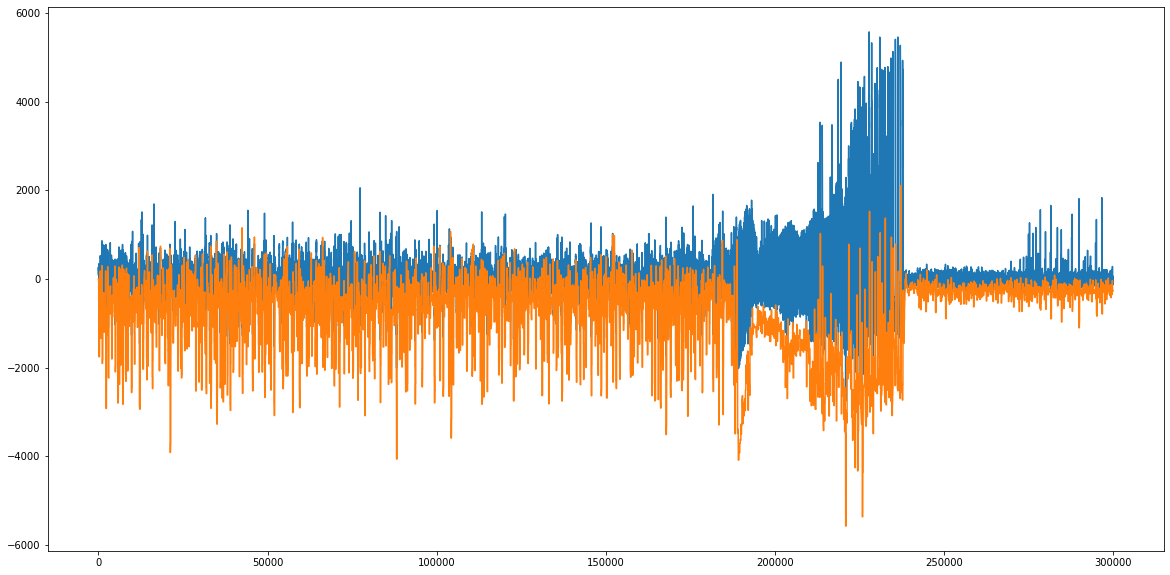

In [20]:
plot_feature(signal, min_seizure1_single_scaled, 0, 300000)

In [21]:
max_seizure1_single = max_feature_signals[0][1]
max_seizure1_single_scaled = scale_signal(max_seizure1_single, window_size, step_size)

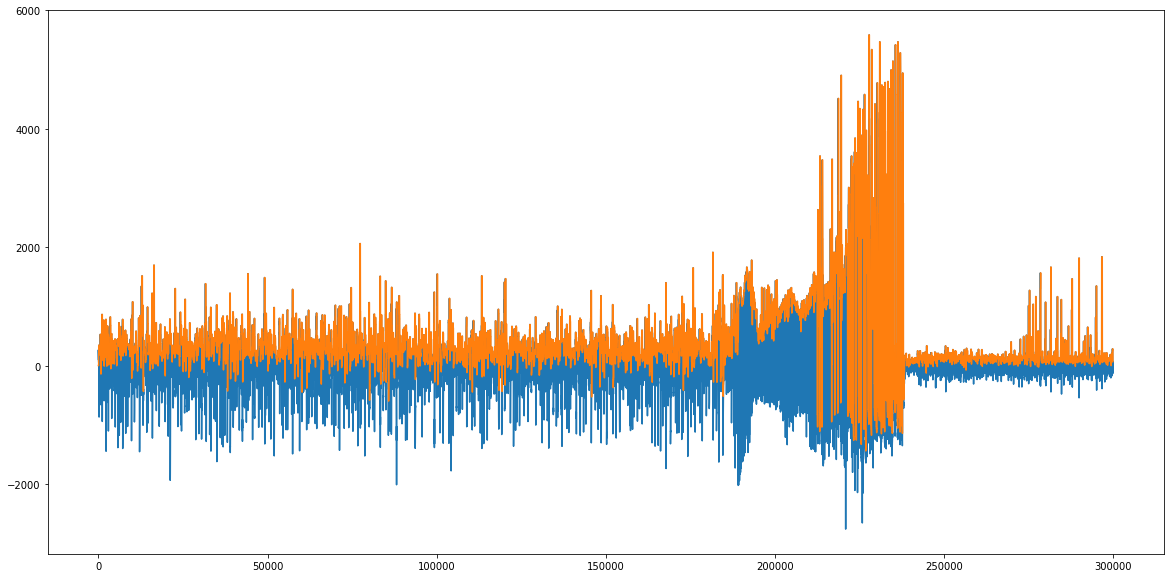

In [22]:
plot_feature(signal, max_seizure1_single_scaled, 0, 300000)

In [23]:
energy_seizure1_single = energy_feature_signals[0][1]
energy_seizure1_single_scaled = scale_signal(energy_seizure1_single, window_size, step_size)

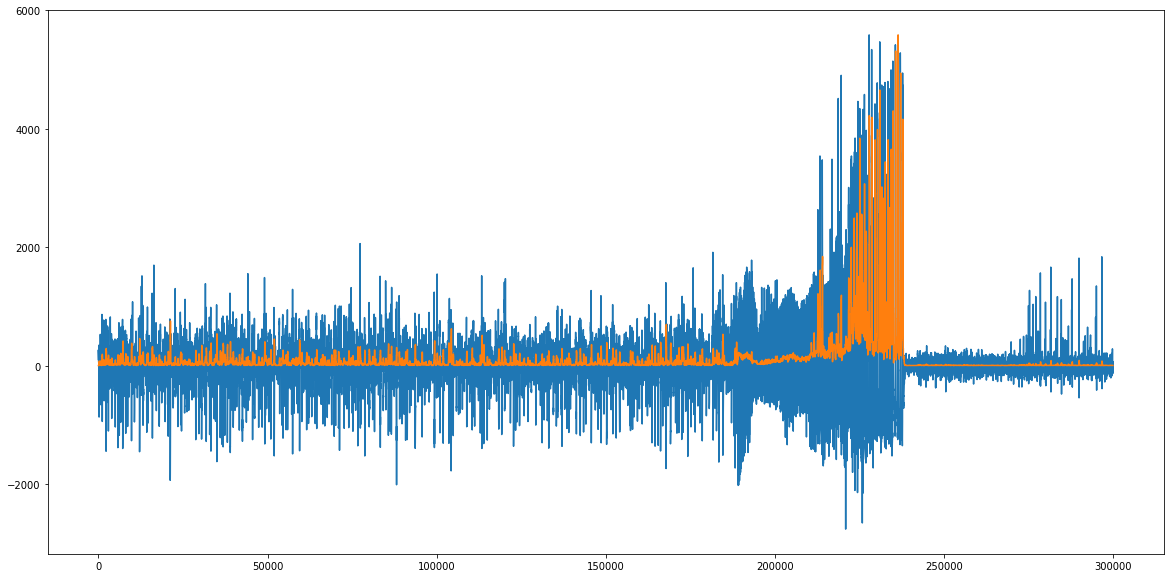

In [24]:
plot_feature(signal, energy_seizure1_single_scaled, 0, 300000)

In [25]:
line_length_seizure1_single = line_length_feature_signals[0][1]
line_length_seizure1_single_scaled = scale_signal(line_length_seizure1_single, window_size, step_size)

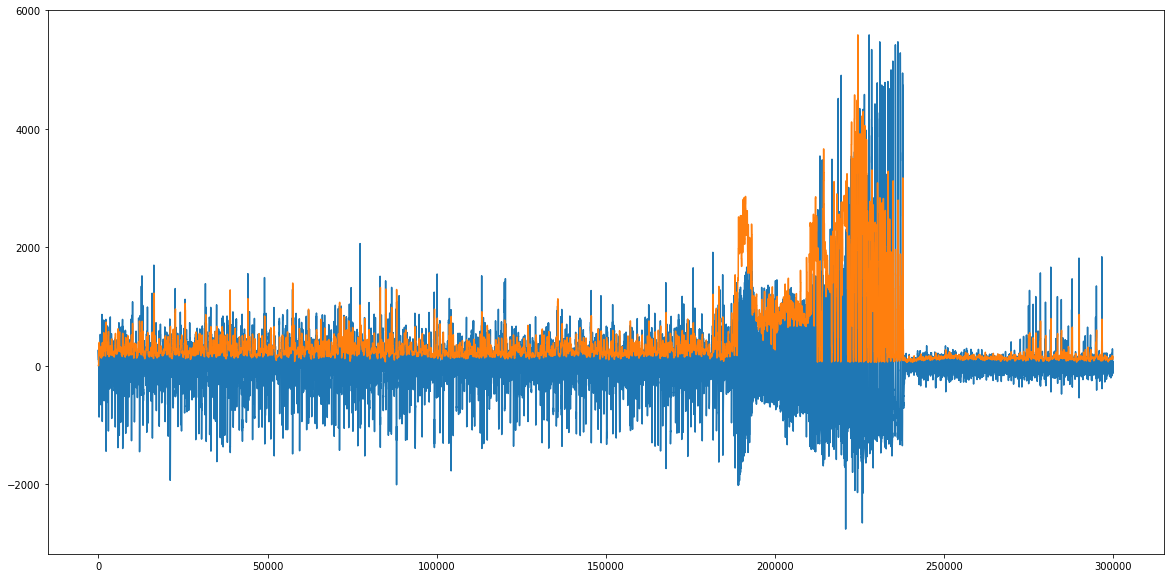

In [26]:
plot_feature(signal, line_length_seizure1_single_scaled, 0, 300000)

In [27]:
moving_avg_seizure1_single = moving_avg_feature_signals[0][1]
moving_avg_seizure1_single_scaled = scale_signal(moving_avg_seizure1_single, window_size, step_size)

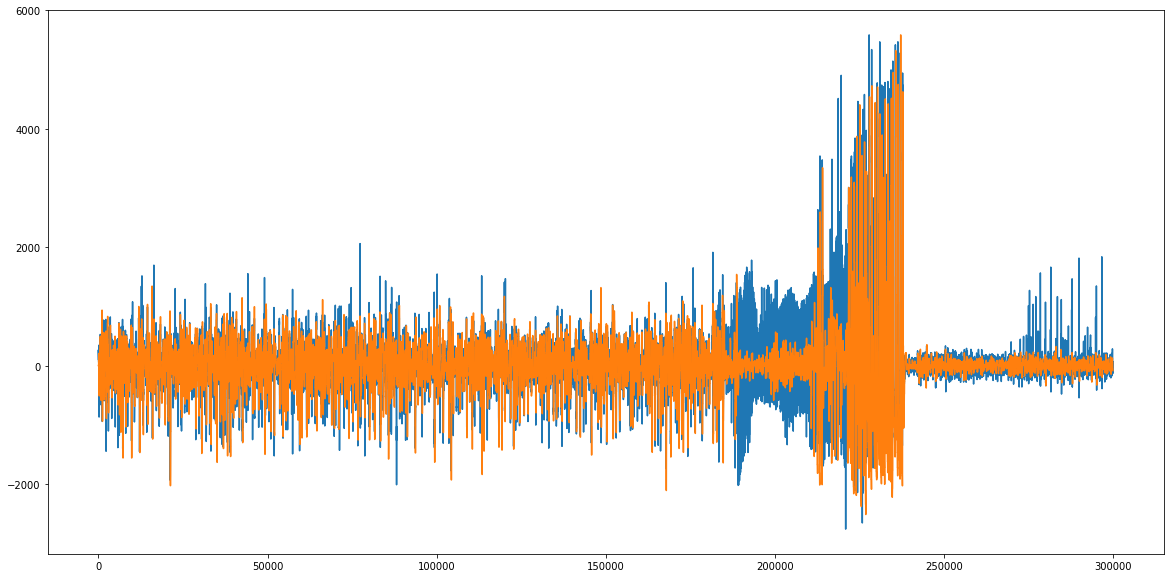

In [28]:
plot_feature(signal, moving_avg_seizure1_single_scaled, 0, 300000)

In [29]:
skewness_seizure1_single = skewness_feature_signals[0][1]
skewness_seizure1_single_scaled = scale_signal(skewness_seizure1_single, window_size, step_size)

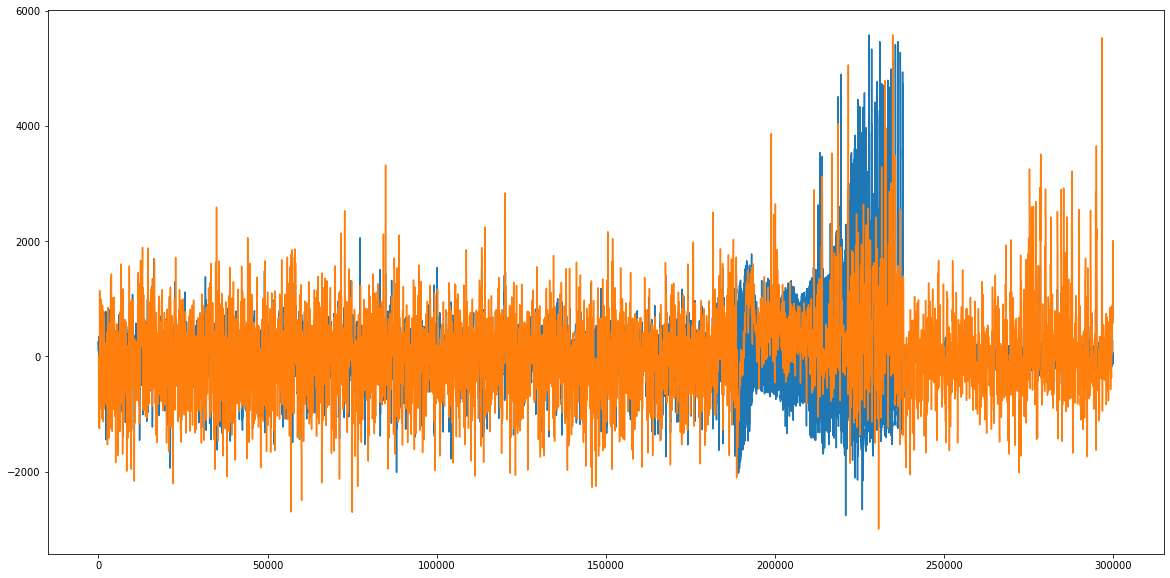

In [30]:
plot_feature(signal, skewness_seizure1_single_scaled, 0, 300000)

In [31]:
kurtosis_seizure1_single = kurtosis_feature_signals[0][1]
kurtosis_seizure1_single_scaled = scale_signal(kurtosis_seizure1_single, window_size, step_size)

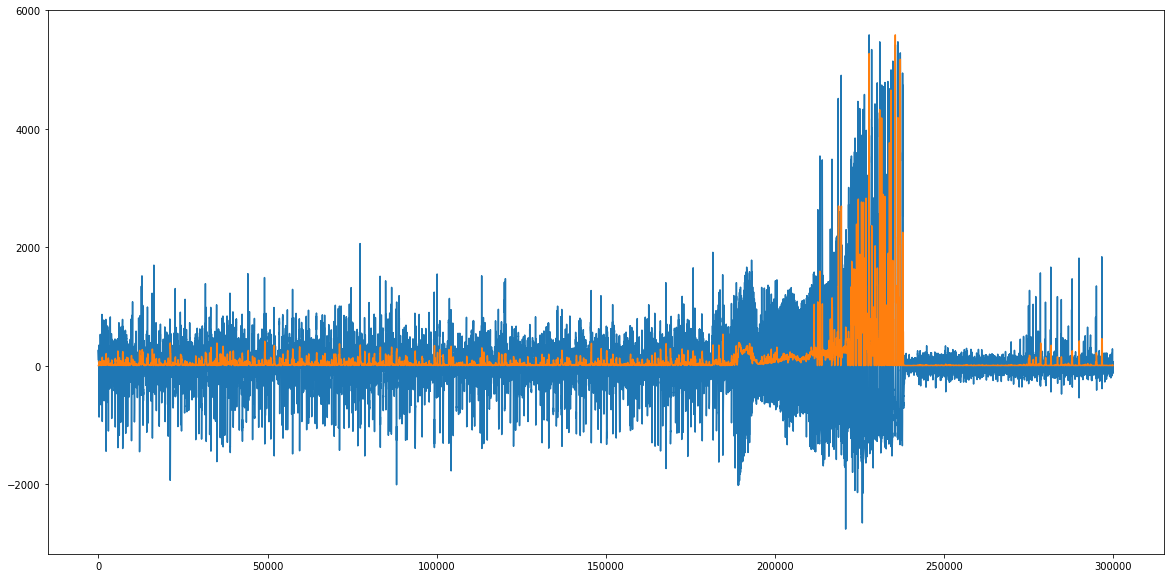

In [32]:
plot_feature(signal, kurtosis_seizure1_single_scaled, 0, 300000)

In [33]:
shannon_entropy_seizure1_single = shannon_entropy_feature_signals[0][1]
shannon_entropy_seizure1_single_scaled = scale_signal(shannon_entropy_seizure1_single, window_size, step_size)

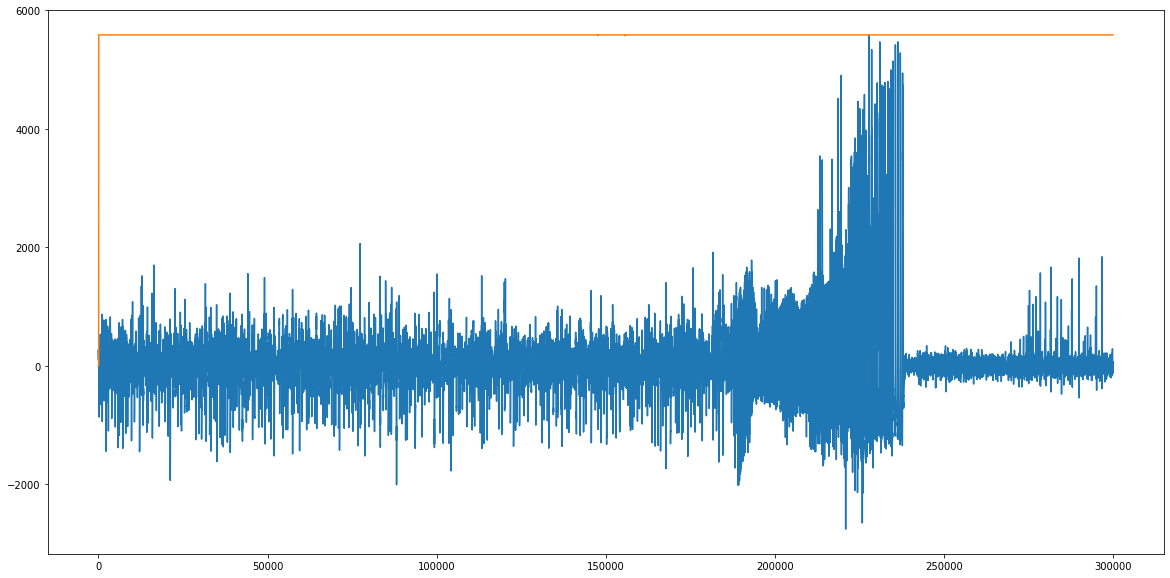

In [34]:
plot_feature(signal, shannon_entropy_seizure1_single_scaled, 0, 300000)

In [35]:
lbp_seizure1_single = lbp_feature_signals[0][1]
lbp_seizure1_single_scaled = scale_signal(lbp_seizure1_single, 16, 8)

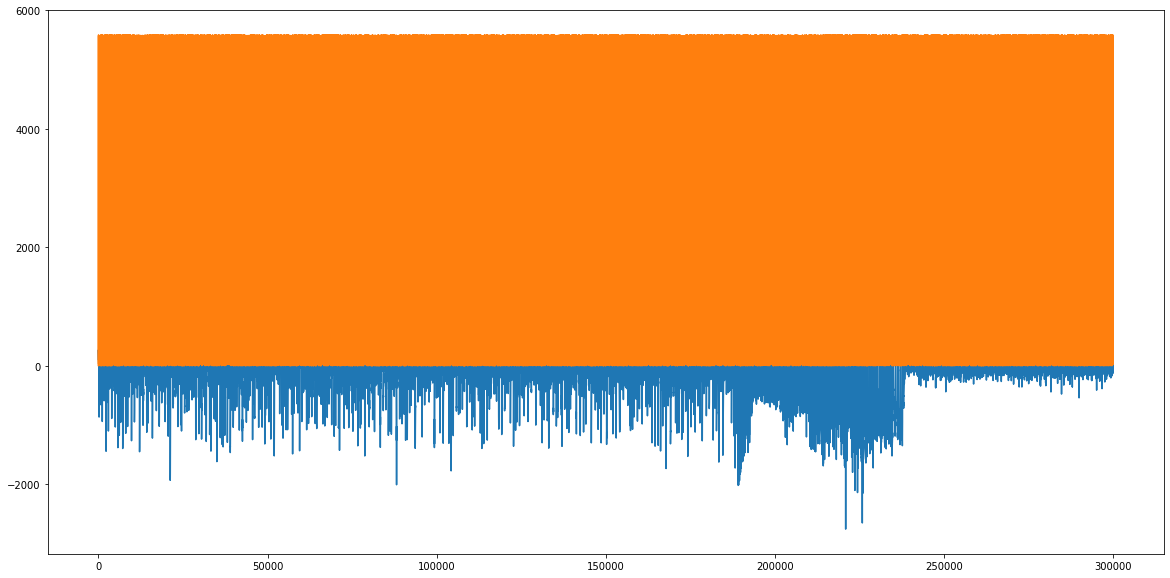

In [36]:
plot_feature(signal, lbp_seizure1_single_scaled, 0, 300000)

In [37]:
phase_synchrony_seizure1_single = phase_synchrony_feature_signals[0][1]
phase_synchrony_seizure1_single_scaled = scale_signal(phase_synchrony_seizure1_single, window_size, step_size)

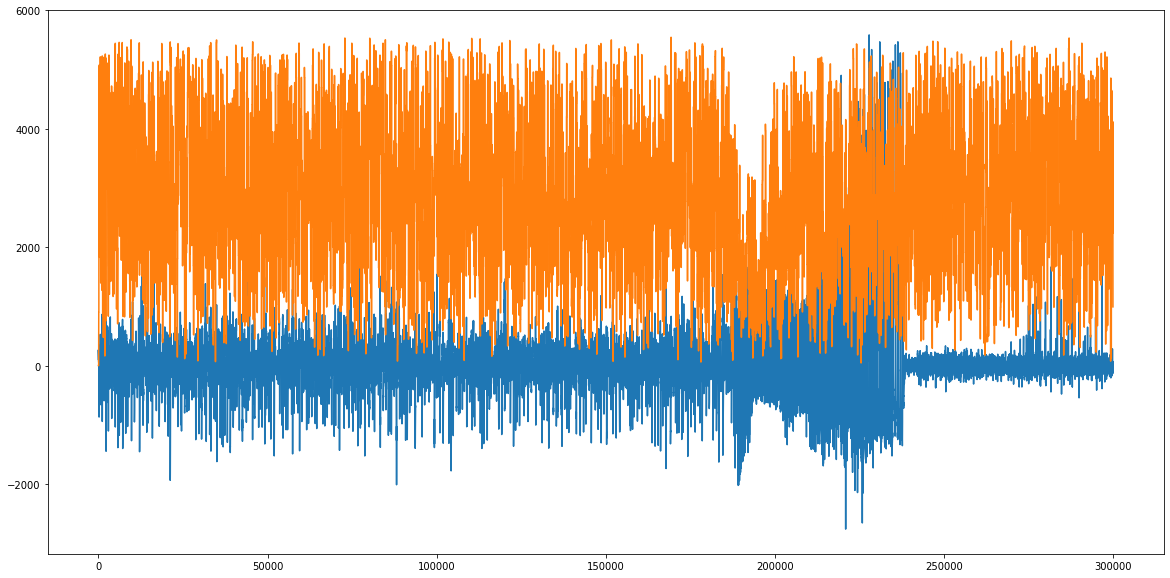

In [38]:
plot_feature(signal, phase_synchrony_seizure1_single_scaled, 0, 300000)

In [39]:
inv_scaled_phase_synchrony_feature = 1/(np.array(phase_synchrony_seizure1_single_scaled)+1)
processed_phase_synchrony_feature = calculate_feature([[inv_scaled_phase_synchrony_feature]], window_size*16, step_size*16, calculate_min)
preprocessed_phase_synchrony_seizure1_single_scaled = scale_signal(processed_phase_synchrony_feature[0][0], window_size*16, step_size*16)

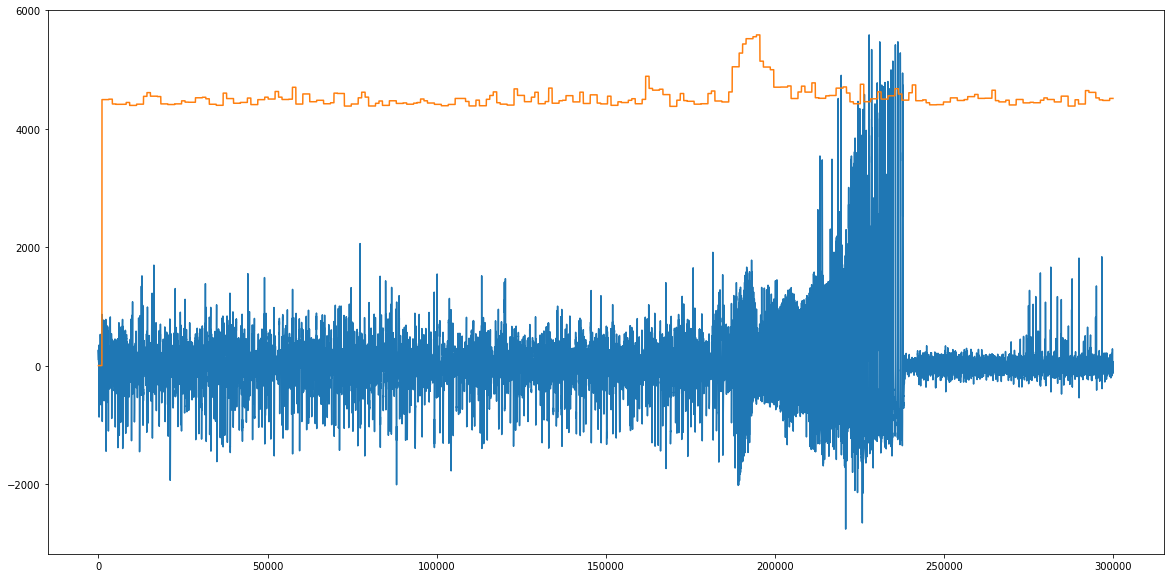

In [40]:
plot_feature(signal, preprocessed_phase_synchrony_seizure1_single_scaled, 0, 300000)

In [41]:
def preprocess_phase_synchrony(signal):
    inv_signal = 1/(np.array(signal)+1)
    return np.min(inv_signal)

In [42]:
phase_synchrony_feature_signals = scale_signal_all_data(phase_synchrony_feature_signals, window_size, step_size)
preprocessed_phase_synchrony_feature_signals = calculate_feature(phase_synchrony_feature_signals, window_size*16, step_size*16, preprocess_phase_synchrony)

In [43]:
preprocessed_phase_synchrony_seizure1_single = preprocessed_phase_synchrony_feature_signals[0][1]
preprocessed_phase_synchrony_seizure1_single_scaled_ = scale_signal(preprocessed_phase_synchrony_seizure1_single, window_size*16, step_size*16)

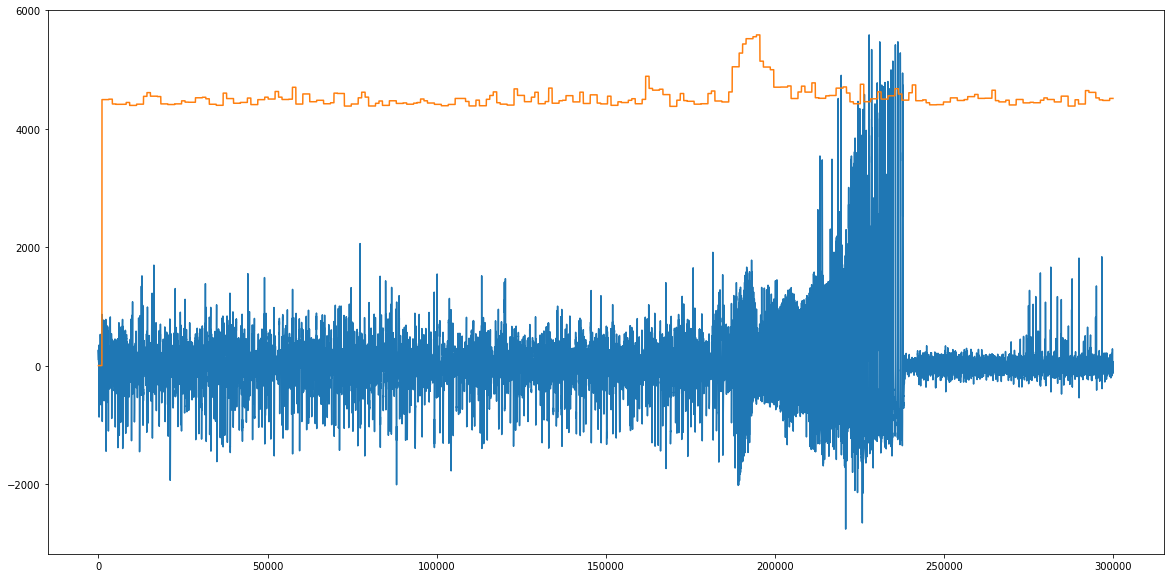

In [44]:
plot_feature(signal, preprocessed_phase_synchrony_seizure1_single_scaled_, 0, 300000)

# Merging data into one single list

In [45]:
all_data_window_ranges, all_data_min = merge_all_data(min_feature_signals, indexes)
_, all_data_max = merge_all_data(max_feature_signals, indexes)
_, all_data_energy = merge_all_data(energy_feature_signals, indexes)
_, all_data_line_length = merge_all_data(line_length_feature_signals, indexes)
_, all_data_moving_avg = merge_all_data(moving_avg_feature_signals, indexes)
_, all_data_skewness = merge_all_data(skewness_feature_signals, indexes)
_, all_data_kurtosis = merge_all_data(kurtosis_feature_signals, indexes)
_, all_data_shannon_entropy = merge_all_data(shannon_entropy_feature_signals, indexes)
_, all_data_lbp = merge_all_data(lbp_feature_signals, indexes)
all_data_window_ranges_, all_data_phase_synchrony = merge_all_data(preprocessed_phase_synchrony_feature_signals, indexes_)

# Calculate metrics according to the threshold value

# Plotting the functions

In [46]:
thresholds, false_alarms_min, delays_min, precisions_min = compute_metrics(all_data_min, all_data_window_ranges, window_size, step_size)

In [47]:
_, false_alarms_max, delays_max, precisions_max = compute_metrics(all_data_max, all_data_window_ranges, window_size, step_size)

In [48]:
_, false_alarms_energy, delays_energy, precisions_energy = compute_metrics(all_data_energy, all_data_window_ranges, window_size, step_size)

In [49]:
_, false_alarms_line_length, delays_line_length, precisions_line_length = compute_metrics(all_data_line_length, all_data_window_ranges, window_size, step_size)

In [50]:
_, false_alarms_moving_avg, delays_moving_avg, precisions_moving_avg = compute_metrics(all_data_moving_avg, all_data_window_ranges, window_size, step_size)

In [51]:
_, false_alarms_skewness, delays_skewness, precisions_skewness = compute_metrics(all_data_skewness, all_data_window_ranges, window_size, step_size)

In [52]:
_, false_alarms_kurtosis, delays_kurtosis, precisions_kurtosis = compute_metrics(all_data_kurtosis, all_data_window_ranges, window_size, step_size)

In [53]:
_, false_alarms_shannon_entropy, delays_shannon_entropy, precisions_shannon_entropy = compute_metrics(all_data_shannon_entropy, all_data_window_ranges, window_size, step_size)

In [54]:
_, false_alarms_lbp, delays_lbp, precisions_lbp = compute_metrics(all_data_lbp, all_data_window_ranges, window_size, step_size)

In [55]:
_, false_alarms_phase_synchrony, delays_phase_synchrony, precisions_phase_synchrony = compute_metrics(all_data_phase_synchrony, all_data_window_ranges_, window_size*16, step_size*16)

In [56]:
weights = (1,1,1)

## Min feature

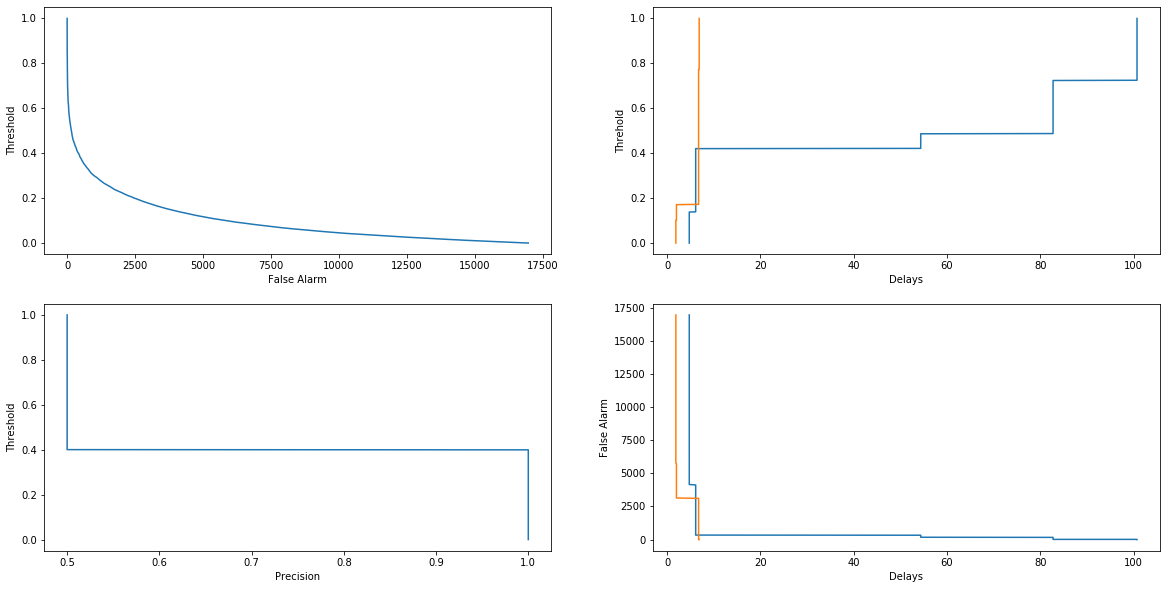

In [57]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_min, delays_min, precisions_min)

In [58]:
scores_min  = compute_score_on_seizures(thresholds, false_alarms_min, precisions_min, delays_min, weights)

Max score for seizure 0 is 0.9987726510501711 for t=0.399
FA: 417
Delay: 6.125212680995868
Precision: 1.0

Max score for seizure 1 is 0.9984821683119519 for t=0.399
FA: 417
Delay: 6.750234383138303
Precision: 1.0



In [59]:
scores_min_f = compute_overall_score(scores_min)

Distance score 0.0001452413691095944
Averaged seizures score 0.9986274096810615
Overall score 6875.640293142168


## Max feature

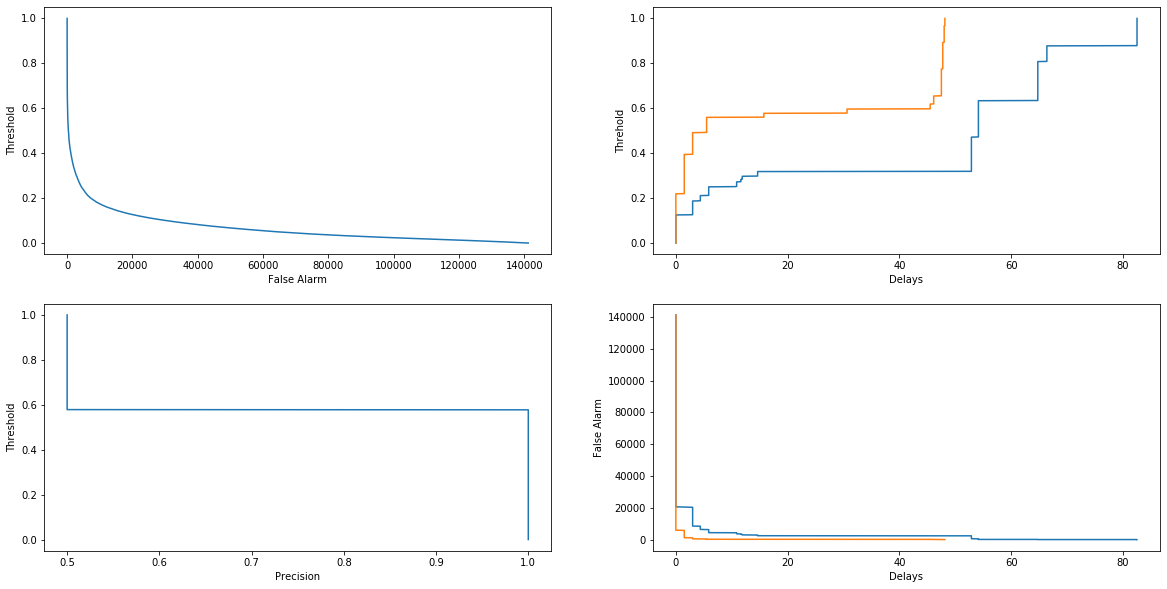

In [60]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_max, delays_max, precisions_max)

In [61]:
scores_max  = compute_score_on_seizures(thresholds, false_alarms_max, precisions_max, delays_max, weights)

Max score for seizure 0 is 0.997577008194217 for t=0.211
FA: 6384
Delay: 4.375151914997049
Precision: 1.0

Max score for seizure 1 is 0.9997941067418263 for t=0.394
FA: 1195
Delay: 1.5000520851418453
Precision: 1.0



In [62]:
scores_max_f = compute_overall_score(scores_max)

Distance score 0.09150671495301564
Averaged seizures score 0.9986855574680217
Overall score 10.913795320712795


## Energy feature

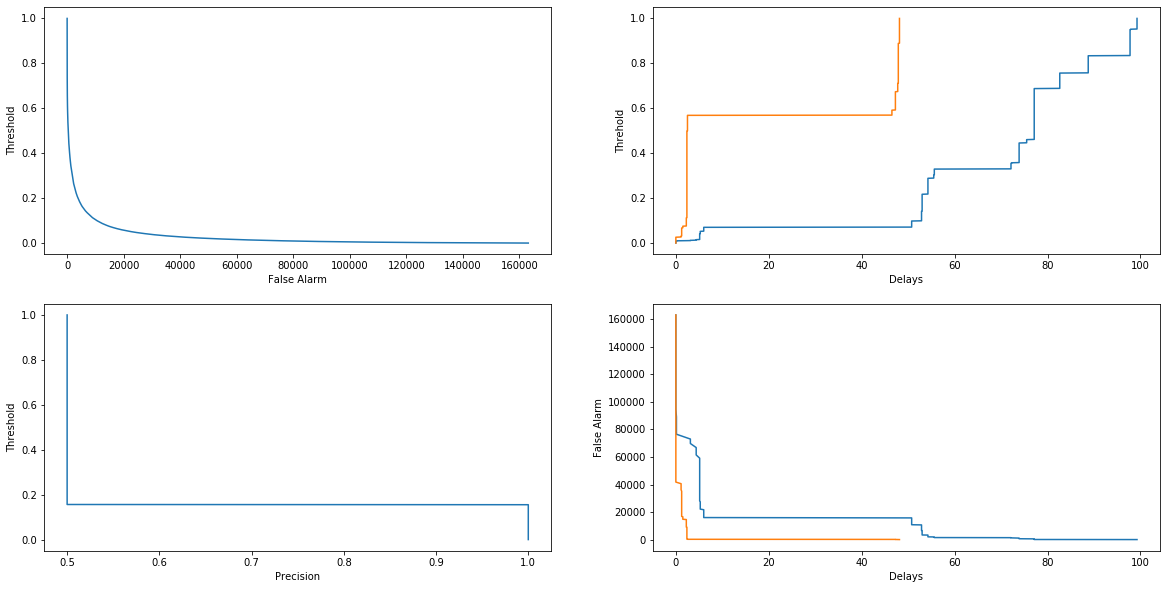

In [63]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_energy, delays_energy, precisions_energy)

In [64]:
scores_energy  = compute_score_on_seizures(thresholds, false_alarms_energy, precisions_energy, delays_energy, weights)

Max score for seizure 0 is 0.9934333901498692 for t=0.07
FA: 15987
Delay: 6.000208340567381
Precision: 1.0

Max score for seizure 1 is 0.9990904929420596 for t=0.155
FA: 5744
Delay: 2.375082468141255
Precision: 1.0



In [65]:
scores_energy_f = compute_overall_score(scores_energy)

Distance score 0.04259402191623082
Averaged seizures score 0.9962619415459644
Overall score 23.389712845274424


## Line length feature

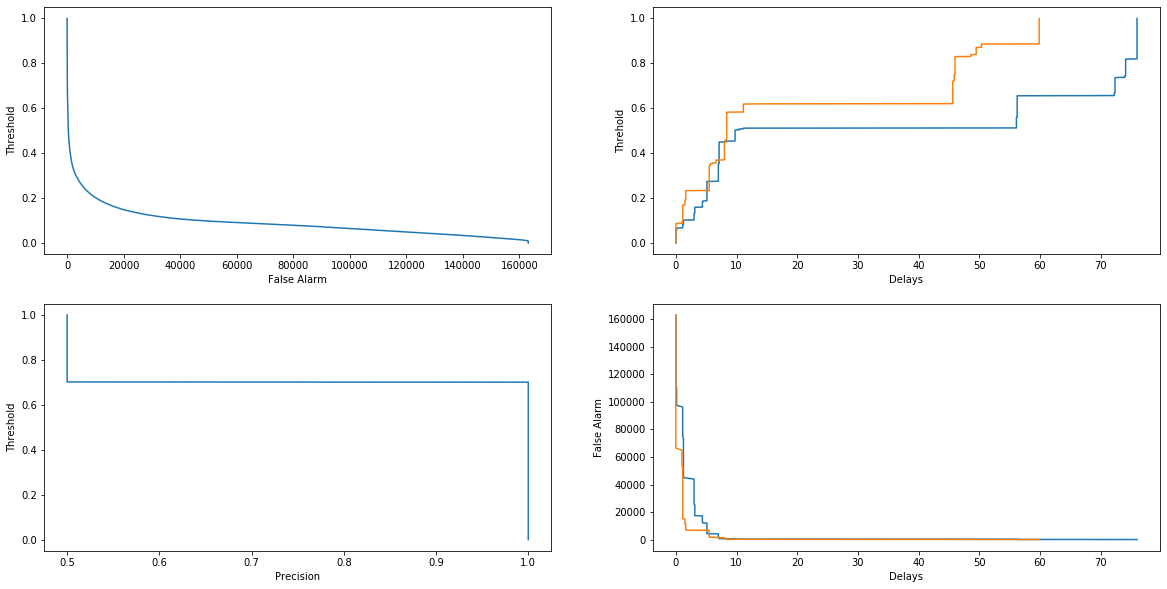

In [66]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_line_length, delays_line_length, precisions_line_length)

In [67]:
scores_line_length = compute_score_on_seizures(thresholds, false_alarms_line_length, precisions_line_length, delays_line_length, weights)

Max score for seizure 0 is 0.9973877063264285 for t=0.274
FA: 4280
Delay: 5.1251779575679715
Precision: 1.0

Max score for seizure 1 is 0.9988777620561303 for t=0.233
FA: 6887
Delay: 1.6250564255703324
Precision: 1.0



In [68]:
scores_line_length_f = compute_overall_score(scores_line_length)

Distance score 0.020513533740421332
Averaged seizures score 0.9981327341912793
Overall score 48.65727898575014


## Moving AVG feature

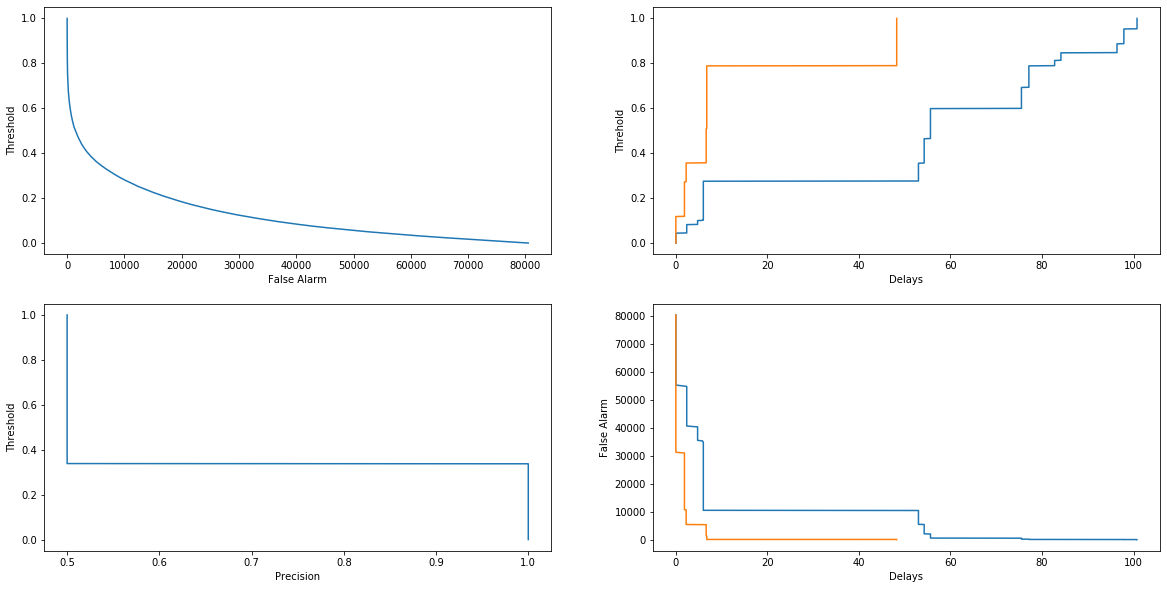

In [69]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_moving_avg, delays_moving_avg, precisions_moving_avg)

In [70]:
scores_moving_avg = compute_score_on_seizures(thresholds, false_alarms_moving_avg, precisions_moving_avg, delays_moving_avg, weights)

Max score for seizure 0 is 0.9898961345152858 for t=0.275
FA: 10487
Delay: 6.000208340567381
Precision: 1.0

Max score for seizure 1 is 0.9965901191066481 for t=0.337
FA: 6415
Delay: 2.2500781277127677
Precision: 1.0



In [71]:
scores_moving_avg_f = compute_overall_score(scores_moving_avg)

Distance score 0.03118015967610411
Averaged seizures score 0.9932431268109669
Overall score 31.85497242889907


## Skewness

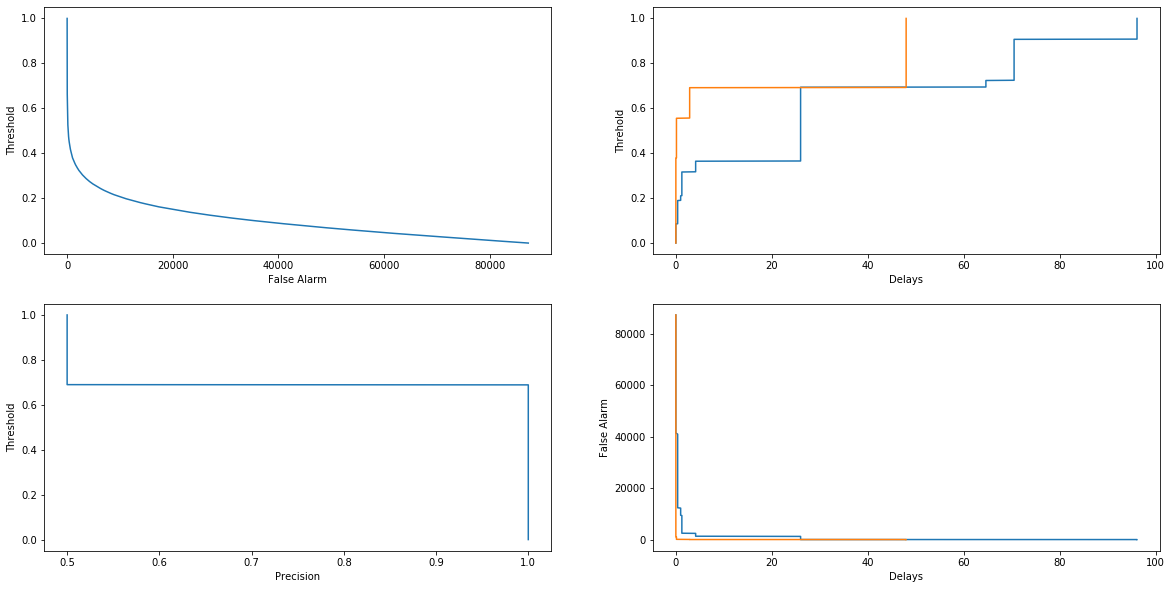

In [72]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_skewness, delays_skewness, precisions_skewness)

In [73]:
scores_skewness = compute_score_on_seizures(thresholds, false_alarms_skewness, precisions_skewness, delays_skewness, weights)

Max score for seizure 0 is 0.9995111746295521 for t=0.316
FA: 2469
Delay: 1.250043404284871
Precision: 1.0

Max score for seizure 1 is 0.9999936112359252 for t=0.555
FA: 92
Delay: 0.1250043404284871
Precision: 1.0



In [74]:
scores_skewness_f = compute_overall_score(scores_skewness)

Distance score 0.1195002434569478
Averaged seizures score 0.9997523929327387
Overall score 8.366111766901279


## kurtosis

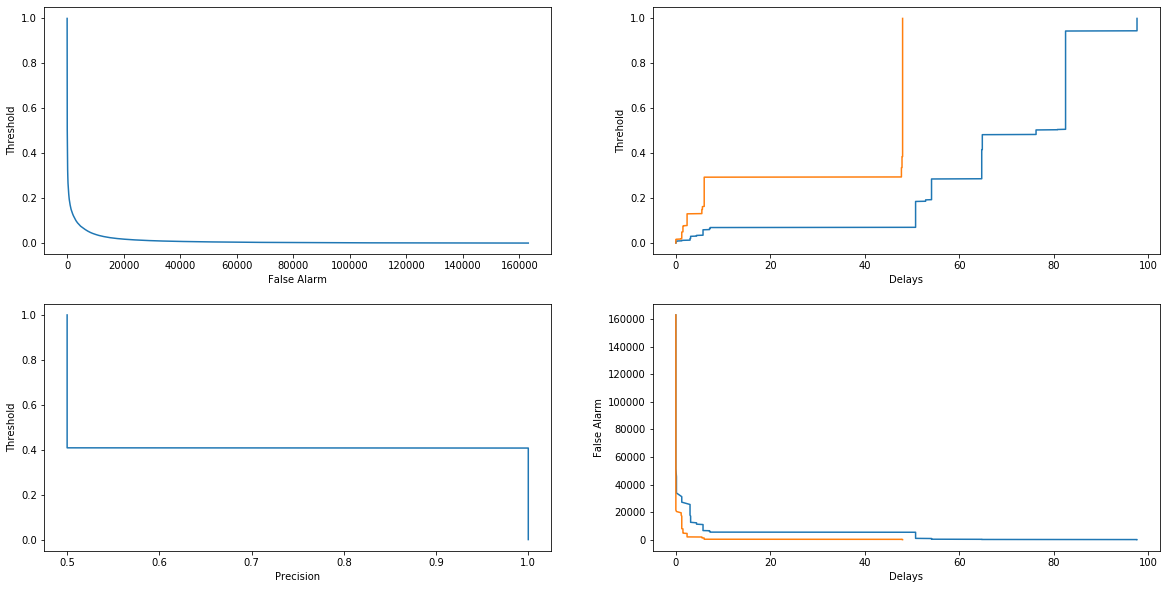

In [75]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_kurtosis, delays_kurtosis, precisions_kurtosis)

In [76]:
scores_kurtosis = compute_score_on_seizures(thresholds, false_alarms_kurtosis, precisions_kurtosis, delays_kurtosis, weights)

Max score for seizure 0 is 0.9974670665077561 for t=0.059000000000000004
FA: 6540
Delay: 5.750199659710407
Precision: 1.0

Max score for seizure 1 is 0.9996290379152816 for t=0.13
FA: 1935
Delay: 2.375082468141255
Precision: 1.0



In [77]:
scores_kurtosis_f = compute_overall_score(scores_kurtosis)

Distance score 0.03551645435698417
Averaged seizures score 0.9985480522115189
Overall score 28.11508272123336


## Shannon entropy

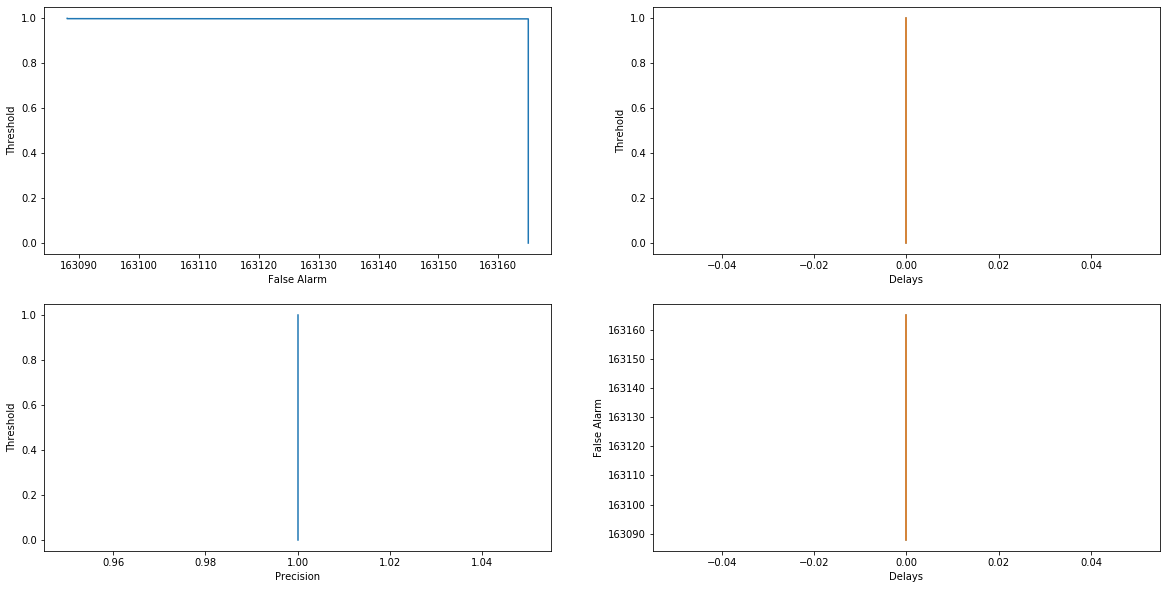

In [78]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_shannon_entropy, delays_shannon_entropy, precisions_shannon_entropy)

In [79]:
scores_shannon_entropy = compute_score_on_seizures(thresholds, false_alarms_shannon_entropy, precisions_shannon_entropy, delays_shannon_entropy, weights)

Max score for seizure 0 is nan for t=0.0
FA: 163165
Delay: 0.0
Precision: 1.0

Max score for seizure 1 is nan for t=0.0
FA: 163165
Delay: 0.0
Precision: 1.0



../src/helpers.py:200: RuntimeWarning: invalid value encountered in true_divide
  normalized_delays = (delays_i - min_delay) / (max_delay - min_delay)


In [80]:
scores_shannon_entropy_f = compute_overall_score(scores_shannon_entropy)

Distance score nan
Averaged seizures score nan
Overall score nan


## LBP feature

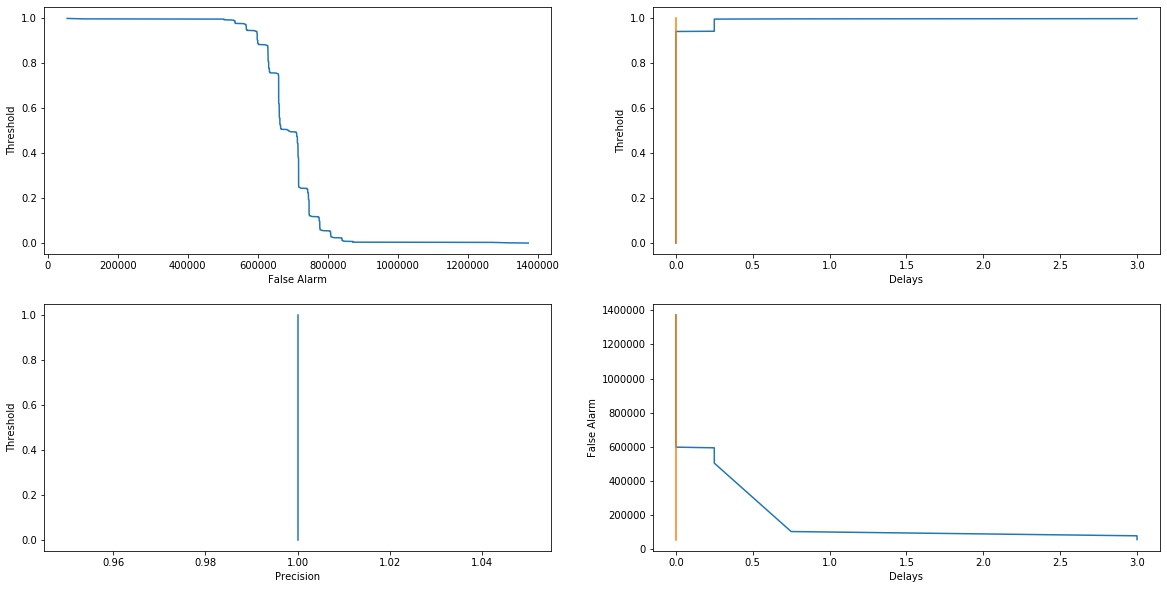

In [81]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_lbp, delays_lbp, precisions_lbp)

In [82]:
scores_lbp  = compute_score_on_seizures(thresholds, false_alarms_lbp, precisions_lbp, delays_lbp, weights)

Max score for seizure 0 is 0.9695569308880764 for t=0.997
FA: 102500
Delay: 0.7500260425709226
Precision: 1.0

Max score for seizure 1 is 0.9999950000374997 for t=0.999
FA: 55486
Delay: 0.0
Precision: 1.0



In [83]:
scores_lbp_f = compute_overall_score(scores_lbp)

Distance score 0.015251852785359218
Averaged seizures score 0.9847759654627881
Overall score 64.56762855776503


## Phase synchrony feature

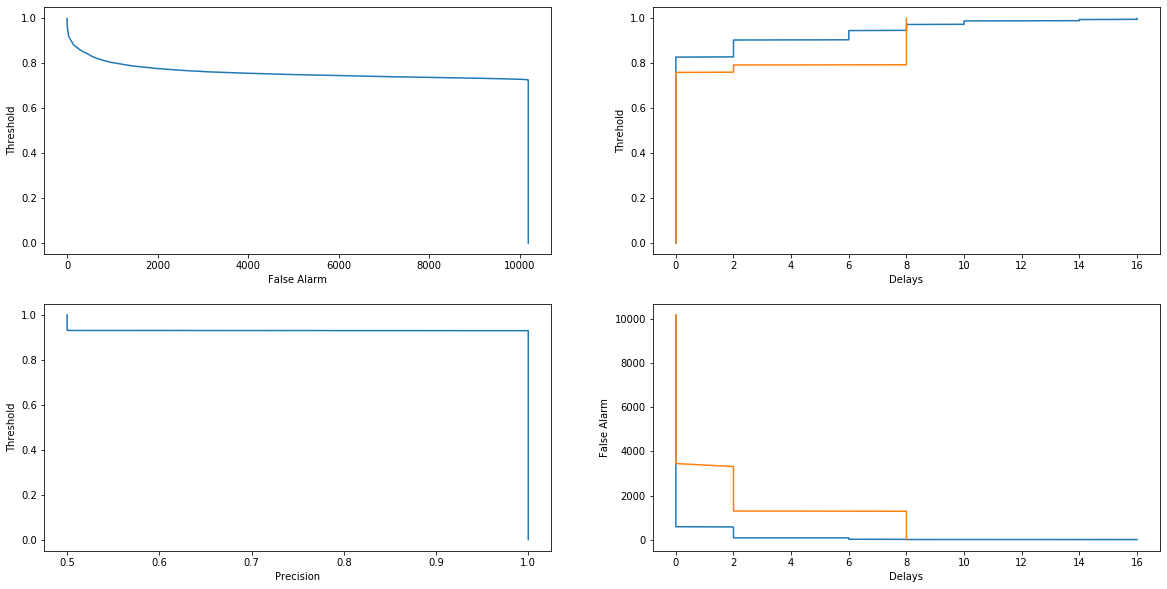

In [84]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_phase_synchrony, delays_phase_synchrony, precisions_phase_synchrony)

In [85]:
scores_phase_synchrony  = compute_score_on_seizures(thresholds, false_alarms_phase_synchrony, precisions_phase_synchrony, delays_phase_synchrony, weights)

Max score for seizure 0 is 0.9983577404910106 for t=0.8270000000000001
FA: 585
Delay: 0.0
Precision: 1.0

Max score for seizure 1 is 0.98446890055603 for t=0.792
FA: 1297
Delay: 2.001111728738188
Precision: 1.0



In [86]:
scores_phase_synchrony_f = compute_overall_score(scores_phase_synchrony)

Distance score 0.018827505641610585
Averaged seizures score 0.9914133205235203
Overall score 52.65770938516689


# Final results

In [87]:
print("Min feature", scores_min_f)
print("Max feature", scores_max_f)
print("Energy feature", scores_energy_f)
print("Line length feature", scores_line_length_f)
print("Moving avg feature", scores_moving_avg_f)
print("Skewness feature", scores_skewness_f)
print("Kurtosis feature", scores_kurtosis_f)
print("Shannon Entropy",scores_shannon_entropy_f)
print("LBP", scores_lbp_f)
print("Phase synchrony",scores_phase_synchrony_f)

Min feature 6875.640293142168
Max feature 10.913795320712795
Energy feature 23.389712845274424
Line length feature 48.65727898575014
Moving avg feature 31.85497242889907
Skewness feature 8.366111766901279
Kurtosis feature 28.11508272123336
Shannon Entropy nan
LBP 64.56762855776503
Phase synchrony 52.65770938516689
